In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
path_coverage = 'tme_data/sets/v2_maze_2/coverage'
path_distances = 'tme_data/sets/v2_maze_2/distances'

In [3]:
os.chdir(path_coverage)

In [4]:
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        return f.read()

In [5]:
matrix_greedy = []
matrix_minPos = []
matrix_combined = []
matrix_nearest = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('greedy' in file_path):
            matrix_greedy.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_minPos.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_combined.append(np.loadtxt(file_path))
        if('nearest' in file_path):
            matrix_nearest.append(np.loadtxt(file_path))

np_matrix_greedy = np.array(matrix_greedy)
np_matrix_minPos = np.array(matrix_minPos)
np_matrix_combined = np.array(matrix_combined)
np_matrix_nearest = np.array(matrix_nearest)
print(np_matrix_greedy.shape)
print(np_matrix_minPos.shape)
print(np_matrix_combined.shape)
print(np_matrix_nearest.shape)

(30,)
(27,)
(20,)
(28,)


In [6]:
os.chdir('../distances')

matrix_distance_greedy = []
matrix_distance_minPos = []
matrix_distance_combined = []
matrix_distance_nearest = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('greedy' in file_path):
            matrix_distance_greedy.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_distance_minPos.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_distance_combined.append(np.loadtxt(file_path))
        if('nearest' in file_path):
            matrix_distance_nearest.append(np.loadtxt(file_path))

matrix_distance_greedy = np.array(matrix_distance_greedy)
matrix_distance_minPos = np.array(matrix_distance_minPos)
matrix_distance_combined = np.array(matrix_distance_combined)
matrix_distance_nearest = np.array(matrix_distance_nearest)
print(matrix_distance_greedy.shape)
print(matrix_distance_minPos.shape)
print(matrix_distance_combined.shape)
print(matrix_distance_nearest.shape)

(30,)
(27,)
(20,)
(28,)


In [255]:
def neg_eighty_check(matrix):
    result = True
    if(matrix.shape[0] == 80):
        result = False
    return result

In [264]:
def eighty_build(matrix):
    result = matrix
    if (neg_eighty_check(matrix)):
        number = 80-matrix.shape[0]
        temp_2 = np.full(number, matrix[-1])
        result = np.insert(result, -1, temp_2)
    return result

In [265]:
def eighty_build_distance(matrix):
    result = matrix
    if (neg_eighty_check(matrix)):
        number = 80-matrix.shape[0]
        #temp_2 = np.full((number, 4), matrix[-1][:])
        #temp_2 = np.repeat(matrix[-1], number, axis=0)
        temp_2 = np.tile(matrix[-1], (number, 1))
        result = np.append(result, temp_2)
        result = result.reshape((80, -1))
    return result

In [284]:
def matrix_builder(matrix, distance_matrix):
    temp = []
    for i in range(80):
        temp.append(i*5)
    temp = np.array(temp)
    result = eighty_build(matrix[0][:, 1])
    result = np.c_[temp, result]
    result_2 = np.array(temp)
    result_2 = eighty_build_distance(distance_matrix[0][:,1:])
    result_2 = np.c_[temp, result_2]
    for i in range(len(matrix) - 1):
        temp = matrix[i+1][:, 1]
        temp = eighty_build(temp)
        temp_2 = distance_matrix[i+1][:,1:]
        temp_2 = eighty_build_distance(temp_2)
        if (temp[-1] > 0.80):
            result = np.c_[result, temp]
            result_2 = np.c_[result_2, temp_2]
    return result, result_2

In [285]:
nearest_plottable, nearest_distance_plottable = matrix_builder(np_matrix_nearest[1:], matrix_distance_nearest[1:])
greedy_plottable, greedy_distance_plottable = matrix_builder(np_matrix_greedy[1:], matrix_distance_greedy[1:])
minPos_plottable, minPos_distance_plottable = matrix_builder(np_matrix_minPos[1:], matrix_distance_minPos[1:])
combined_plottable, combined_distance_plottable = matrix_builder(np_matrix_combined[1:], matrix_distance_combined[1:])

In [288]:
print(nearest_plottable.shape)
print(greedy_plottable.shape)
print(minPos_plottable.shape)
print(combined_plottable.shape)
print(nearest_distance_plottable.shape)
print(greedy_distance_plottable.shape)
print(minPos_distance_plottable.shape)
print(combined_distance_plottable.shape)

(80, 21)
(80, 28)
(80, 23)
(80, 18)
(80, 81)
(80, 109)
(80, 89)
(80, 69)
[395.          65.27053847  89.2752944   32.          40.
  61.53128062 110.46701806  43.          56.          75.65216608
  92.45770774  52.          46.          84.89574482  86.86796446
  52.          43.         100.69294415 107.68076701  46.
  43.          95.9202817   75.61062699  39.          47.
  84.28254645 122.86009072  45.          47.          96.60249844
  86.73651874  41.          35.          64.54434708  92.84368691
  45.          42.         113.71274854 357.3233092   53.
  41.          73.93963132 120.57907114  44.          38.
  56.12595027  83.91026393  44.          41.          96.47751204
  87.64237583  49.          39.         100.75734864 190.65452192
  46.          37.         100.2437198   83.68353897  46.
  41.          79.25295161  62.37323014  43.          43.
 100.11881684  89.66913808  45.          49.        ]


In [ ]:
nearest_mean = np.mean(nearest_plottable[:,1:-1], axis=1)
greedy_mean = np.mean(greedy_plottable[:,1:-1], axis=1)
minPos_mean = np.mean(minPos_plottable[:,1:-1], axis=1)
combined_mean = np.mean(combined_plottable[:,1:-1], axis=1)

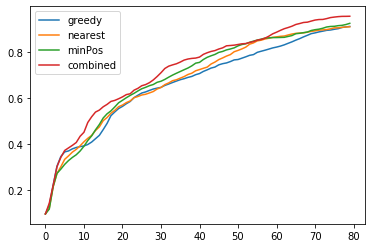

In [ ]:
plt.plot(greedy_mean, label='greedy')
plt.plot(nearest_mean, label='nearest')
plt.plot(minPos_mean, label='minPos')
plt.plot(combined_mean, label='combined')
plt.legend()
plt.show()

TODO:
- mean-duration
- mean-discovery
- #runs
- distance measurements and their respective plots
  - distance traveled
  - distribution between robots
    - distance
    - #frontiers
- do all this for more robots

In [ ]:
graph = greedy_plottable
greedy_min = np.min(graph[:,1:-1], axis=1)
greedy_overall_min = greedy_min[-1]
greedy_max = np.max(graph[:,1:-1], axis=1)
greedy_overall_max = greedy_max[-1]
graph = nearest_plottable
nearest_min = np.min(graph[:,1:-1], axis=1)
nearest_overall_min = nearest_min[-1]
nearest_max = np.max(graph[:,1:-1], axis=1)
nearest_overall_max = nearest_max[-1]
graph = minPos_plottable
minPos_min = np.min(graph[:,1:-1], axis=1)
minPos_overall_min = minPos_min[-1]
minPos_max = np.max(graph[:,1:-1], axis=1)
minPos_overall_max = minPos_max[-1]
graph = combined_plottable
combined_min = np.min(graph[:,1:-1], axis=1)
combined_overall_min = combined_min[-1]
combined_max = np.max(graph[:,1:-1], axis=1)
combined_overall_max = combined_max[-1]

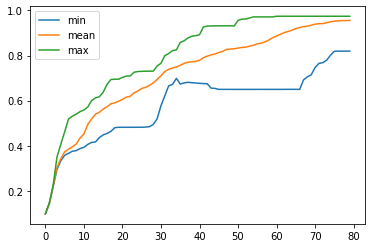

In [ ]:
plt.plot(combined_min, label='min')
plt.plot(combined_mean, label='mean')
plt.plot(combined_max, label='max')
plt.legend()
plt.show()

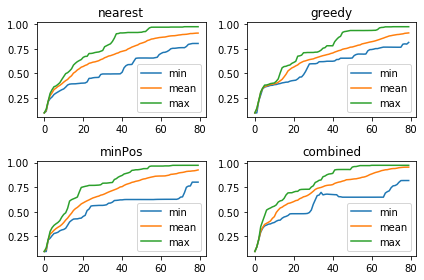

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(nearest_min, label='min')
ax1.plot(nearest_mean, label='mean')
ax1.plot(nearest_max, label='max')
ax1.legend()
ax1.set_title('nearest')
ax2.plot(greedy_min, label='min')
ax2.plot(greedy_mean, label='mean')
ax2.plot(greedy_max, label='max')
ax2.legend()
ax2.set_title('greedy')
ax3.plot(minPos_min, label='min')
ax3.plot(minPos_mean, label='mean')
ax3.plot(minPos_max, label='max')
ax3.legend()
ax3.set_title('minPos')
ax4.plot(combined_min, label='min')
ax4.plot(combined_mean, label='mean')
ax4.plot(combined_max, label='max')
ax4.legend()
ax4.set_title('combined')
fig.tight_layout()

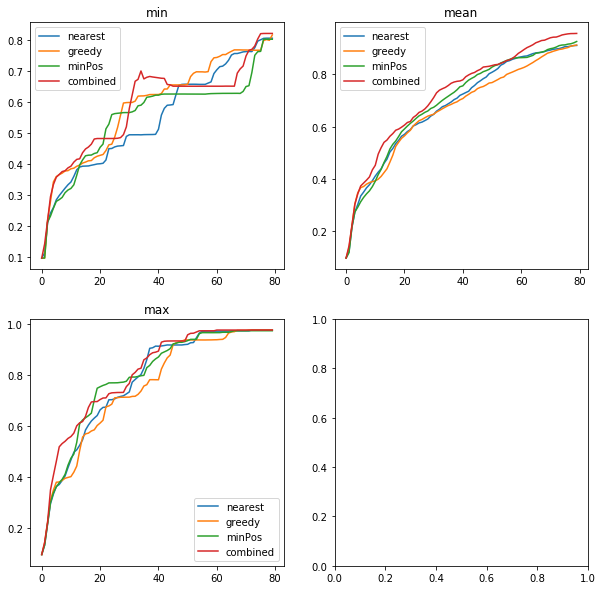

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(nearest_min, label='nearest')
ax1.plot(greedy_min, label='greedy')
ax1.plot(minPos_min, label='minPos')
ax1.plot(combined_min, label='combined')
ax1.legend()
ax1.set_title('min')
ax2.plot(nearest_mean, label='nearest')
ax2.plot(greedy_mean, label='greedy')
ax2.plot(minPos_mean, label='minPos')
ax2.plot(combined_mean, label='combined')
ax2.legend()
ax2.set_title('mean')
ax3.plot(nearest_max, label='nearest')
ax3.plot(greedy_max, label='greedy')
ax3.plot(minPos_max, label='minPos')
ax3.plot(combined_max, label='combined')
ax3.legend()
ax3.set_title('max')
fig.set_size_inches(10, 10)


In [ ]:
os.chdir('../distances')

matrix_distance_greedy = []
matrix_distance_minPos = []
matrix_distance_combined = []
matrix_distance_nearest = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('greedy' in file_path):
            matrix_distance_greedy.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_distance_minPos.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_distance_combined.append(np.loadtxt(file_path))
        if('nearest' in file_path):
            matrix_distance_nearest.append(np.loadtxt(file_path))

matrix_distance_greedy = np.array(matrix_distance_greedy)
matrix_distance_minPos = np.array(matrix_distance_minPos)
matrix_distance_combined = np.array(matrix_distance_combined)
matrix_distance_nearest = np.array(matrix_distance_nearest)
print(matrix_distance_greedy.shape)
print(matrix_distance_minPos.shape)
print(matrix_distance_combined.shape)
print(matrix_distance_nearest.shape)

In [ ]:
matrix_distance_greedy[0][-1,1:]

array([64.74250111, 61.06767826, 41.        , 43.        ])

In [ ]:
testing_123 = np.array([1,2,3,4])
testing_123 = np.tile(testing_123, (4,1))
testing_123

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])